# Quantize and De-quantize a Tensor

In [62]:
import torch

## Quantization with Random `Scale` and `Zero Point`
- Implement Linear Quantization for when the "scale" and the "zero point" are known/randomly selected.

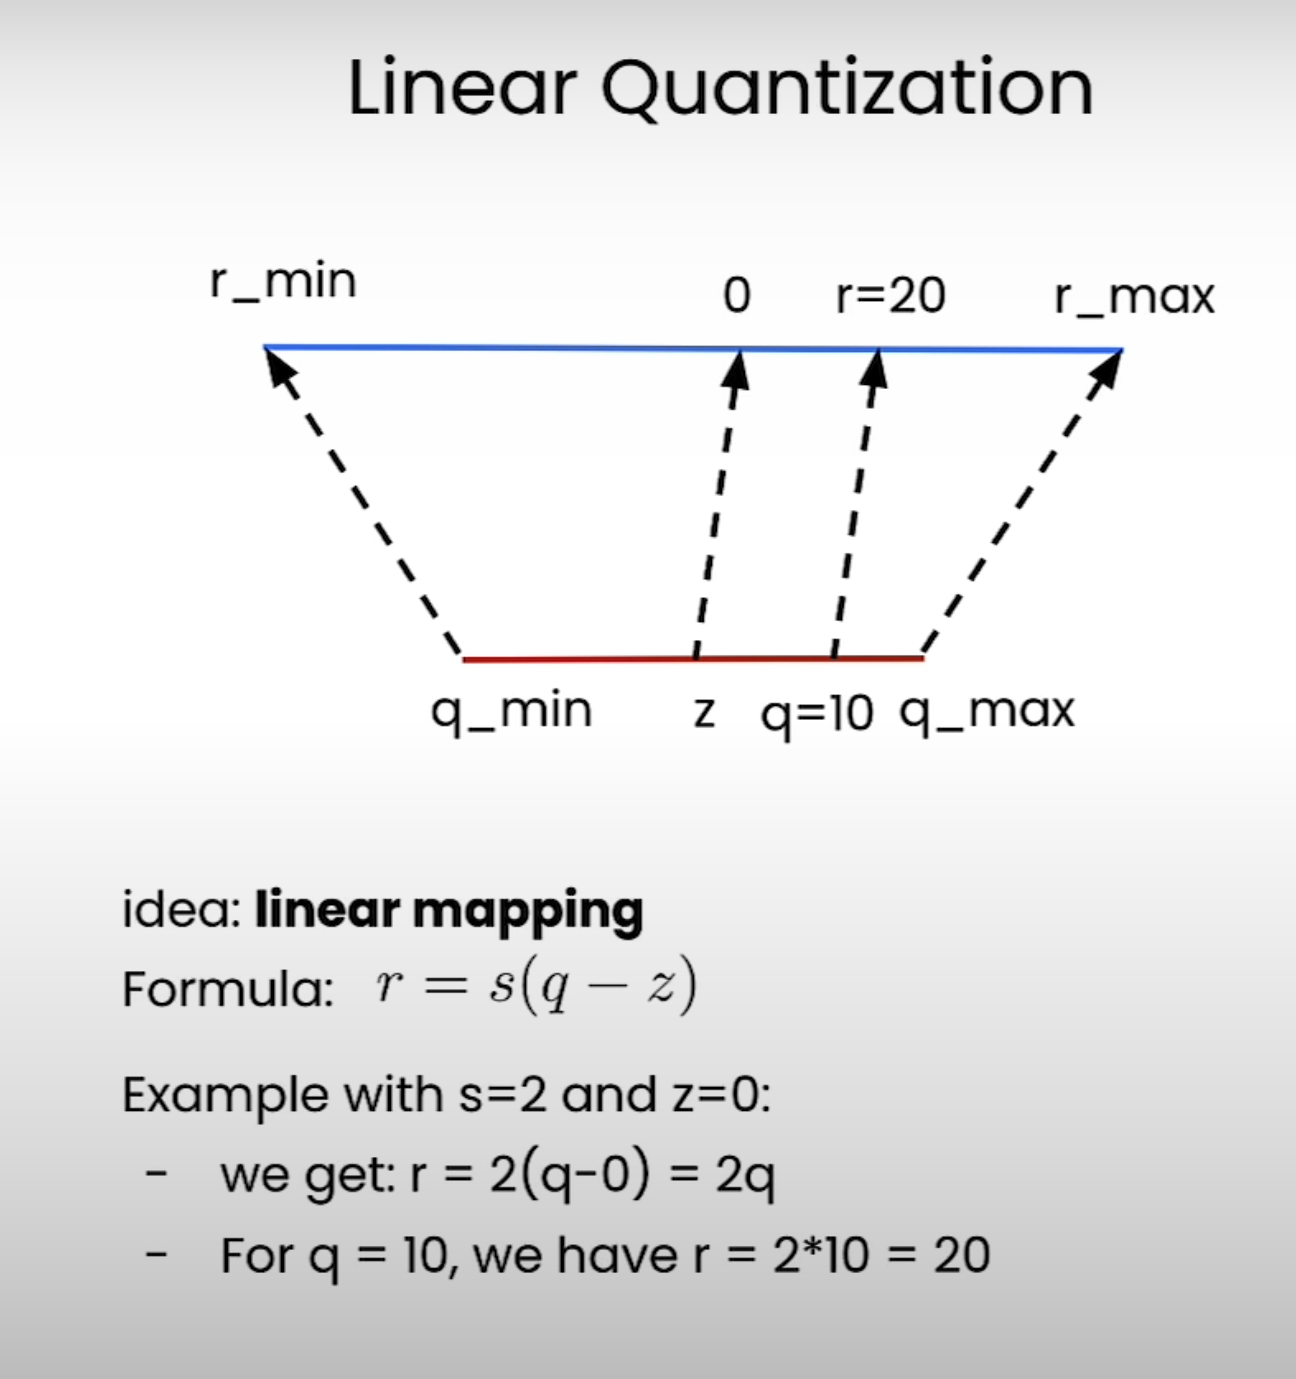


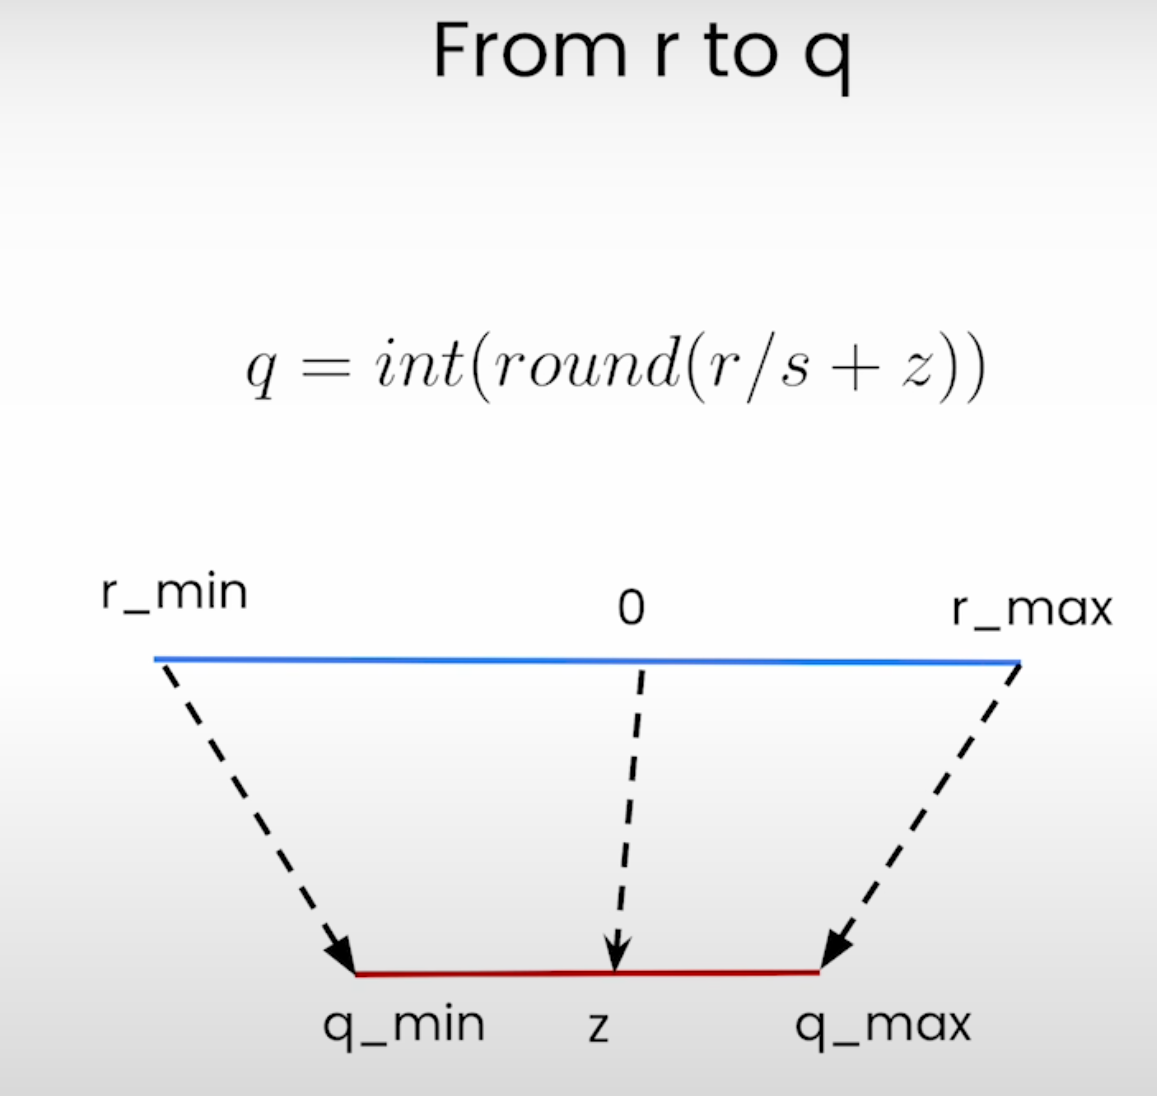

In [63]:
def linear_q_with_scale_and_zero_point(
    tensor, scale, zero_point, dtype = torch.int8):

    scaled_and_shifted_tensor = tensor / scale + zero_point

    rounded_tensor = torch.round(scaled_and_shifted_tensor)

    q_min = torch.iinfo(dtype).min
    q_max = torch.iinfo(dtype).max

    q_tensor = rounded_tensor.clamp(q_min,q_max).to(dtype)
    
    return q_tensor

In [87]:
# Creating a dummy tensor
dummy_tensor = torch.tensor(
    [[191.6, -13.5, 728.6],
     [92.14, 295.5,  -184],
     [0,     684.6, 245.5]]
)

In [100]:
### these are random values for "scale" and "zero_point"
### to test the implementation
scale = 3.5
zero_point = 70

In [101]:
quantized_tensor = linear_q_with_scale_and_zero_point(
    dummy_tensor, scale, zero_point)

In [102]:
quantized_tensor

tensor([[125,  66, 127],
        [ 96, 127,  17],
        [ 70, 127, 127]], dtype=torch.int8)

## Dequantization with Random `Scale` and `Zero Point`

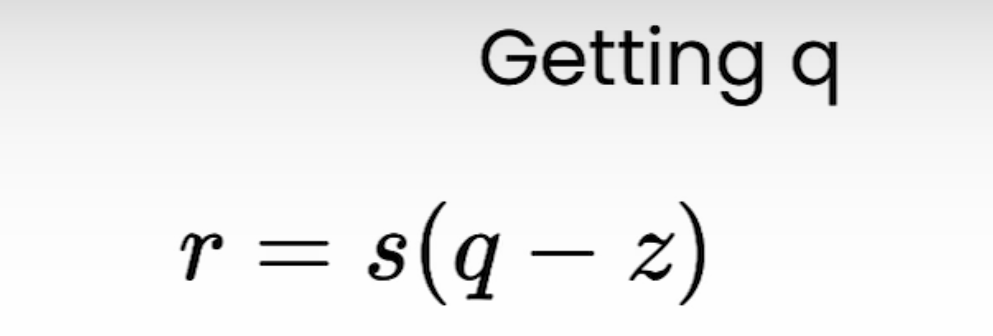

In [103]:
dequantized_tensor = scale * (quantized_tensor.float() - zero_point)

In [104]:
# # Creating a dummy tensor   ||| 
# dummy_tensor = torch.tensor(
#     [[120.3,  -45.7,  512.9],
#      [78.4,   250.2,  -130.7],
#      [-15.2,  480.3,  300.1]]
# )

In [105]:
dequantized_tensor

tensor([[ 192.5000,  -14.0000,  199.5000],
        [  91.0000,  199.5000, -185.5000],
        [   0.0000,  199.5000,  199.5000]])

In [106]:
### without casting to float
scale * (quantized_tensor - zero_point)

tensor([[ 192.5000,  -14.0000,  199.5000],
        [  91.0000,  199.5000, -185.5000],
        [   0.0000,  199.5000,  199.5000]])

In [107]:
def linear_dequantization(quantized_tensor, scale, zero_point):
    return scale * (quantized_tensor.float() - zero_point)

- Calculate `dequantized_tensor` using the function `linear_dequantization`.

In [108]:
dequantized_tensor = linear_dequantization(
    quantized_tensor, scale, zero_point)

- Print the results of the `dequantized_tensor`.

In [109]:
dequantized_tensor

tensor([[ 192.5000,  -14.0000,  199.5000],
        [  91.0000,  199.5000, -185.5000],
        [   0.0000,  199.5000,  199.5000]])

### Quantization Error

- Load the `plot_quantization_errors` from the helper file.
- To access the `helper.py` file, you can click `File --> Open...`, on the top left.

In [110]:
from helper import plot_quantization_errors

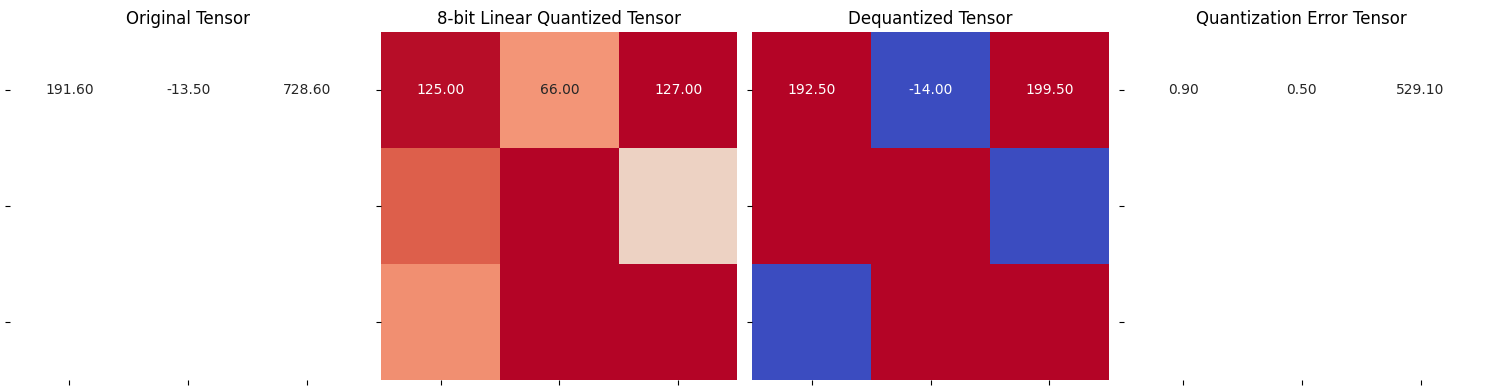

In [111]:
plot_quantization_errors(dummy_tensor, quantized_tensor,
                         dequantized_tensor)

**Note:** For the plot above, `Quantization Error Tensor = abs(Original Tensor - Dequantized Tensor)`

- Calculate an "overall" quantization error by using [Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error) technique.

In [112]:
dequantized_tensor - dummy_tensor

tensor([[ 8.9999e-01, -5.0000e-01, -5.2910e+02],
        [-1.1400e+00, -9.6000e+01, -1.5000e+00],
        [ 0.0000e+00, -4.8510e+02, -4.6000e+01]])

In [113]:
(dequantized_tensor - dummy_tensor).square()

tensor([[8.0999e-01, 2.5000e-01, 2.7995e+05],
        [1.2996e+00, 9.2160e+03, 2.2500e+00],
        [0.0000e+00, 2.3532e+05, 2.1160e+03]])

In [114]:
(dequantized_tensor - test_tensor).square().mean()

tensor(58511.7070)